In [1]:
# Prediction of Placement of students using Logistic Regression.

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
# Imported necessary libraries

In [4]:
url='https://docs.google.com/spreadsheets/d/1KcdVW6UwzQA14tjSKBllbQtEVDm58tQP/edit?usp=sharing&ouid=117428935617588544811&rtpof=true&sd=true'
file_id=url.split('/')[-2]
dwn_url='https://drive.google.com/uc?id=' + file_id
df = pd.read_excel(dwn_url)

In [5]:
# Reading data into a DataFrame from dataset stored on my Google Drive.

In [6]:
df

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,NaN
4,5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210,211,M,80.60,Others,82.00,Others,Commerce,77.60,Comm&Mgmt,No,91.0,Mkt&Fin,74.49,Placed,400000.0
211,212,M,58.00,Others,60.00,Others,Science,72.00,Sci&Tech,No,74.0,Mkt&Fin,53.62,Placed,275000.0
212,213,M,67.00,Others,67.00,Others,Commerce,73.00,Comm&Mgmt,Yes,59.0,Mkt&Fin,69.72,Placed,295000.0
213,214,F,74.00,Others,66.00,Others,Commerce,58.00,Comm&Mgmt,No,70.0,Mkt&HR,60.23,Placed,204000.0


In [7]:
df.shape

(215, 15)

In [8]:
# Contains 215 rows and 15 columns

In [9]:
df.head(10)

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.00,Mkt&HR,58.80,Placed,270000.0
1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.50,Mkt&Fin,66.28,Placed,200000.0
2,3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.00,Mkt&Fin,57.80,Placed,250000.0
3,4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.00,Mkt&HR,59.43,Not Placed,NaN
4,5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.80,Mkt&Fin,55.50,Placed,425000.0
5,6,M,55.00,Others,49.80,Others,Science,67.25,Sci&Tech,Yes,55.00,Mkt&Fin,51.58,Not Placed,NaN
6,7,F,46.00,Others,49.20,Others,Commerce,79.00,Comm&Mgmt,No,74.28,Mkt&Fin,53.29,Not Placed,NaN
7,8,M,82.00,Central,64.00,Central,Science,66.00,Sci&Tech,Yes,67.00,Mkt&Fin,62.14,Placed,252000.0
8,9,M,73.00,Central,79.00,Central,Commerce,72.00,Comm&Mgmt,No,91.34,Mkt&Fin,61.29,Placed,231000.0
9,10,M,58.00,Central,70.00,Central,Commerce,61.00,Comm&Mgmt,No,54.00,Mkt&Fin,52.21,Not Placed,NaN


In [10]:
df.tail(10)

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
205,206,M,61.00,Others,62.0,Others,Commerce,65.0,Comm&Mgmt,No,62.00,Mkt&Fin,56.81,Placed,250000.0
206,207,M,41.00,Central,42.0,Central,Science,60.0,Comm&Mgmt,No,97.00,Mkt&Fin,53.39,Not Placed,NaN
207,208,M,83.33,Central,78.0,Others,Commerce,61.0,Comm&Mgmt,Yes,88.56,Mkt&Fin,71.55,Placed,300000.0
208,209,F,43.00,Central,60.0,Others,Science,65.0,Comm&Mgmt,No,92.66,Mkt&HR,62.92,Not Placed,NaN
209,210,M,62.00,Central,72.0,Central,Commerce,65.0,Comm&Mgmt,No,67.00,Mkt&Fin,56.49,Placed,216000.0
210,211,M,80.60,Others,82.0,Others,Commerce,77.6,Comm&Mgmt,No,91.00,Mkt&Fin,74.49,Placed,400000.0
211,212,M,58.00,Others,60.0,Others,Science,72.0,Sci&Tech,No,74.00,Mkt&Fin,53.62,Placed,275000.0
212,213,M,67.00,Others,67.0,Others,Commerce,73.0,Comm&Mgmt,Yes,59.00,Mkt&Fin,69.72,Placed,295000.0
213,214,F,74.00,Others,66.0,Others,Commerce,58.0,Comm&Mgmt,No,70.00,Mkt&HR,60.23,Placed,204000.0
214,215,M,62.00,Central,58.0,Others,Science,53.0,Comm&Mgmt,No,89.00,Mkt&HR,60.22,Not Placed,NaN


In [11]:
# Viewed the head and tail of the df to get a basic idea of the dataset.

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 215 entries, 0 to 214
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   sl_no           215 non-null    int64  
 1   gender          215 non-null    object 
 2   ssc_p           215 non-null    float64
 3   ssc_b           215 non-null    object 
 4   hsc_p           215 non-null    float64
 5   hsc_b           215 non-null    object 
 6   hsc_s           215 non-null    object 
 7   degree_p        215 non-null    float64
 8   degree_t        215 non-null    object 
 9   workex          215 non-null    object 
 10  etest_p         215 non-null    float64
 11  specialisation  215 non-null    object 
 12  mba_p           215 non-null    float64
 13  status          215 non-null    object 
 14  salary          148 non-null    float64
dtypes: float64(6), int64(1), object(8)
memory usage: 25.3+ KB


In [13]:
# 6 Float, 1 int and 8 object datatype columns. No wrong datatype columns.

In [14]:
df.describe()

,sl_no,ssc_p,hsc_p,degree_p,etest_p,mba_p,salary
count,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,148.000000
mean,108.000000,67.303395,66.333163,66.370186,72.100558,62.278186,288655.405405
std,62.209324,10.827205,10.897509,7.358743,13.275956,5.833385,93457.452420
min,1.000000,40.890000,37.000000,50.000000,50.000000,51.210000,200000.000000
25%,54.500000,60.600000,60.900000,61.000000,60.000000,57.945000,240000.000000
50%,108.000000,67.000000,65.000000,66.000000,71.000000,62.000000,265000.000000
75%,161.500000,75.700000,73.000000,72.000000,83.500000,66.255000,300000.000000
max,215.000000,89.400000,97.700000,91.000000,98.000000,77.890000,940000.000000


In [15]:
# Descriptive statistics.

In [16]:
df.duplicated().sum()

0

In [17]:
# No duplicate rows in the dataset.

In [18]:
df.isna().sum()

sl_no              0
gender             0
ssc_p              0
ssc_b              0
hsc_p              0
hsc_b              0
hsc_s              0
degree_p           0
degree_t           0
workex             0
etest_p            0
specialisation     0
mba_p              0
status             0
salary            67
dtype: int64

In [19]:
#67 null values in Salary

In [20]:
df.select_dtypes('object').nunique()

gender            2
ssc_b             2
hsc_b             2
hsc_s             3
degree_t          3
workex            2
specialisation    2
status            2
dtype: int64

In [21]:
# Number of unique variables/categories in object datatype columns.

In [22]:
df.gender.value_counts()

M    139
F     76
Name: gender, dtype: int64

In [23]:
# 139 Male and 76 Female students.

In [24]:
df.columns

Index(['sl_no', 'gender', 'ssc_p', 'ssc_b', 'hsc_p', 'hsc_b', 'hsc_s',
       'degree_p', 'degree_t', 'workex', 'etest_p', 'specialisation', 'mba_p',
       'status', 'salary'],
      dtype='object')

In [25]:
df.ssc_b.value_counts()

Central    116
Others      99
Name: ssc_b, dtype: int64

In [26]:
# 116 from Central Board, 99 from other boards

In [27]:
df.hsc_b.value_counts()

Others     131
Central     84
Name: hsc_b, dtype: int64

In [28]:
# 84 from Central Board, 131 from other boards

In [29]:
df.hsc_s.value_counts()

Commerce    113
Science      91
Arts         11
Name: hsc_s, dtype: int64

In [30]:
# HSC Specialization - Commerce 113, Science 91, Arts 11

In [31]:
df.degree_t.value_counts()

Comm&Mgmt    145
Sci&Tech      59
Others        11
Name: degree_t, dtype: int64

In [32]:
# Degree specialization

In [33]:
df.workex.value_counts()

No     141
Yes     74
Name: workex, dtype: int64

In [34]:
# 74 candidates have work experience

In [35]:
df[(df['workex']=='Yes') & (df['status']=='Placed')].count().head(1)

sl_no    64
dtype: int64

In [36]:
# Out of 75 people with work experience, 64 are placed. 11 have not been placed.

In [37]:
df1 = df[df['status']=='Placed']

In [38]:
# DataFrame with all placed students.

In [39]:
df1

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
4,5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0
7,8,M,82.00,Central,64.00,Central,Science,66.00,Sci&Tech,Yes,67.0,Mkt&Fin,62.14,Placed,252000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
209,210,M,62.00,Central,72.00,Central,Commerce,65.00,Comm&Mgmt,No,67.0,Mkt&Fin,56.49,Placed,216000.0
210,211,M,80.60,Others,82.00,Others,Commerce,77.60,Comm&Mgmt,No,91.0,Mkt&Fin,74.49,Placed,400000.0
211,212,M,58.00,Others,60.00,Others,Science,72.00,Sci&Tech,No,74.0,Mkt&Fin,53.62,Placed,275000.0
212,213,M,67.00,Others,67.00,Others,Commerce,73.00,Comm&Mgmt,Yes,59.0,Mkt&Fin,69.72,Placed,295000.0


In [40]:
df1.groupby('hsc_s').count()

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
hsc_s,,,,,,,,,,,,,,
Arts,6,6,6,6,6,6,6,6,6,6,6,6,6,6
Commerce,79,79,79,79,79,79,79,79,79,79,79,79,79,79
Science,63,63,63,63,63,63,63,63,63,63,63,63,63,63


In [41]:
# Placed students according to HSC streams.

In [42]:
df1.groupby('hsc_s').get_group('Arts')

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
2,3,M,65.0,Central,68.0,Central,Arts,64.00,Comm&Mgmt,No,75.00,Mkt&Fin,57.80,Placed,250000.0
19,20,M,60.0,Others,67.0,Others,Arts,70.00,Comm&Mgmt,Yes,50.48,Mkt&Fin,77.89,Placed,236000.0
76,77,F,66.5,Others,70.4,Central,Arts,71.93,Comm&Mgmt,No,61.00,Mkt&Fin,64.27,Placed,230000.0
122,123,F,66.5,Central,66.8,Central,Arts,69.30,Comm&Mgmt,Yes,80.40,Mkt&Fin,71.00,Placed,236000.0
148,149,F,77.0,Central,86.0,Central,Arts,56.00,Others,No,57.00,Mkt&Fin,64.08,Placed,240000.0
193,194,F,60.0,Central,63.0,Central,Arts,56.00,Others,Yes,80.00,Mkt&HR,56.63,Placed,300000.0


In [43]:
# Details of placed Arts students from the groupby

In [44]:
# Placed and unplaced students according to HSC streams.

df.groupby('hsc_s')['status'].value_counts()

hsc_s     status    
Arts      Placed         6
          Not Placed     5
Commerce  Placed        79
          Not Placed    34
Science   Placed        63
          Not Placed    28
Name: status, dtype: int64

In [45]:
df1.salary.mean()

288655.4054054054

In [46]:
# Mean salary of all placed students.

In [47]:
df1.degree_t.value_counts()

Comm&Mgmt    102
Sci&Tech      41
Others         5
Name: degree_t, dtype: int64

In [48]:
# Which degrees have the highest average salary?

df1.groupby('degree_t').salary.mean().sort_values(ascending=False)

degree_t
Sci&Tech     314609.756098
Others       280400.000000
Comm&Mgmt    278627.450980
Name: salary, dtype: float64

In [49]:
df1.groupby('degree_t').salary.max().sort_values(ascending=False)

degree_t
Comm&Mgmt    940000.0
Sci&Tech     690000.0
Others       360000.0
Name: salary, dtype: float64

In [50]:
# The highest salary obtained by placed students from each degree.

<AxesSubplot:xlabel='salary', ylabel='degree_p'>

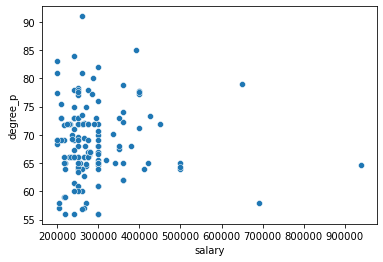

In [51]:
# Relation between salary and percentage obtained during degree

sns.scatterplot(data=df1,x="salary",y="degree_p")

In [52]:
# The data is concentrated between the salary scale of 2 Lakhs and 4.5-5 Lakhs.
# There is no specific relation between them, as students with lower percentages 
# as well as higher percentages are between similar payscales.

In [53]:
df.specialisation.value_counts()

Mkt&Fin    120
Mkt&HR      95
Name: specialisation, dtype: int64

In [54]:
df2 =  pd.get_dummies(df,drop_first=True)
df2.head()

,sl_no,ssc_p,hsc_p,degree_p,etest_p,mba_p,salary,gender_M,ssc_b_Others,hsc_b_Others,hsc_s_Commerce,hsc_s_Science,degree_t_Others,degree_t_Sci&Tech,workex_Yes,specialisation_Mkt&HR,status_Placed
0,1,67.00,91.00,58.00,55.0,58.80,270000.0,1,1,1,1,0,0,1,0,1,1
1,2,79.33,78.33,77.48,86.5,66.28,200000.0,1,0,1,0,1,0,1,1,0,1
2,3,65.00,68.00,64.00,75.0,57.80,250000.0,1,0,0,0,0,0,0,0,0,1
3,4,56.00,52.00,52.00,66.0,59.43,NaN,1,0,0,0,1,0,1,0,1,0
4,5,85.80,73.60,73.30,96.8,55.50,425000.0,1,0,0,1,0,0,0,0,0,1


In [55]:
# One Hot encoding the categorical columns into numbers, to prepare them for logistic regression.

In [56]:
df2.drop(['sl_no','salary'],axis=1,inplace=True)

In [57]:
# Dropping columns unnecessary for logistic regression.

In [58]:
df2

,ssc_p,hsc_p,degree_p,etest_p,mba_p,gender_M,ssc_b_Others,hsc_b_Others,hsc_s_Commerce,hsc_s_Science,degree_t_Others,degree_t_Sci&Tech,workex_Yes,specialisation_Mkt&HR,status_Placed
0,67.00,91.00,58.00,55.0,58.80,1,1,1,1,0,0,1,0,1,1
1,79.33,78.33,77.48,86.5,66.28,1,0,1,0,1,0,1,1,0,1
2,65.00,68.00,64.00,75.0,57.80,1,0,0,0,0,0,0,0,0,1
3,56.00,52.00,52.00,66.0,59.43,1,0,0,0,1,0,1,0,1,0
4,85.80,73.60,73.30,96.8,55.50,1,0,0,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210,80.60,82.00,77.60,91.0,74.49,1,1,1,1,0,0,0,0,0,1
211,58.00,60.00,72.00,74.0,53.62,1,1,1,0,1,0,1,0,0,1
212,67.00,67.00,73.00,59.0,69.72,1,1,1,1,0,0,0,1,0,1
213,74.00,66.00,58.00,70.0,60.23,0,1,1,1,0,0,0,0,1,1


In [59]:
from sklearn.preprocessing import MinMaxScaler

In [60]:
# Importing library used to scale data.

In [61]:
scaler = MinMaxScaler()

In [62]:
df3 = pd.DataFrame(scaler.fit_transform(df2[['ssc_p','hsc_p','degree_p','etest_p','mba_p']]),columns=['ssc_p','hsc_p','degree_p','etest_p','mba_p'],index=df2.index)

In [63]:
# Scaling the columns of numerical datatype, and providing the relevant column names into a new DataFrame.

In [64]:
df3

,ssc_p,hsc_p,degree_p,etest_p,mba_p
0,0.538240,0.889621,0.195122,0.104167,0.284483
1,0.792414,0.680890,0.670244,0.760417,0.564843
2,0.497011,0.510708,0.341463,0.520833,0.247001
3,0.311482,0.247117,0.048780,0.333333,0.308096
4,0.925788,0.602965,0.568293,0.975000,0.160795
...,...,...,...,...,...
210,0.818594,0.741351,0.673171,0.854167,0.872564
211,0.352711,0.378913,0.536585,0.500000,0.090330
212,0.538240,0.494234,0.560976,0.187500,0.693778
213,0.682540,0.477759,0.195122,0.416667,0.338081


In [65]:
df2[['ssc_p','hsc_p','degree_p','etest_p','mba_p']]=df3[['ssc_p','hsc_p','degree_p','etest_p','mba_p']]

In [66]:
# Importing the scaled data from new DataFrame to old.

In [67]:
df2

,ssc_p,hsc_p,degree_p,etest_p,mba_p,gender_M,ssc_b_Others,hsc_b_Others,hsc_s_Commerce,hsc_s_Science,degree_t_Others,degree_t_Sci&Tech,workex_Yes,specialisation_Mkt&HR,status_Placed
0,0.538240,0.889621,0.195122,0.104167,0.284483,1,1,1,1,0,0,1,0,1,1
1,0.792414,0.680890,0.670244,0.760417,0.564843,1,0,1,0,1,0,1,1,0,1
2,0.497011,0.510708,0.341463,0.520833,0.247001,1,0,0,0,0,0,0,0,0,1
3,0.311482,0.247117,0.048780,0.333333,0.308096,1,0,0,0,1,0,1,0,1,0
4,0.925788,0.602965,0.568293,0.975000,0.160795,1,0,0,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210,0.818594,0.741351,0.673171,0.854167,0.872564,1,1,1,1,0,0,0,0,0,1
211,0.352711,0.378913,0.536585,0.500000,0.090330,1,1,1,0,1,0,1,0,0,1
212,0.538240,0.494234,0.560976,0.187500,0.693778,1,1,1,1,0,0,0,1,0,1
213,0.682540,0.477759,0.195122,0.416667,0.338081,0,1,1,1,0,0,0,0,1,1


In [68]:
y=df2.status_Placed
x=df2.drop('status_Placed',axis=1)

In [69]:
# Splitting the DataFrame into dependent and independent variables.

In [70]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=0,test_size=0.2)

In [71]:
# Splitting the variables into train and test data.

In [72]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn import linear_model
from sklearn import metrics

In [73]:
# Importing libraries needed for logistic regression.

In [74]:
reg=linear_model.LogisticRegression()
reg.fit(x_train,y_train)
print("accuracy: "+ str(reg.score(x_test,y_test)*100) + "%")

accuracy: 81.3953488372093%


In [75]:
# Fitting the train data on the logistic regression model.

In [76]:
y_pred=reg.predict(x_test)

In [77]:
# Predicting the test data on the model fitted with train data.

In [78]:
cm = metrics.confusion_matrix(y_test, y_pred)
cm

array([[10,  6],
       [ 2, 25]], dtype=int64)

In [79]:
# Confusion matrix.

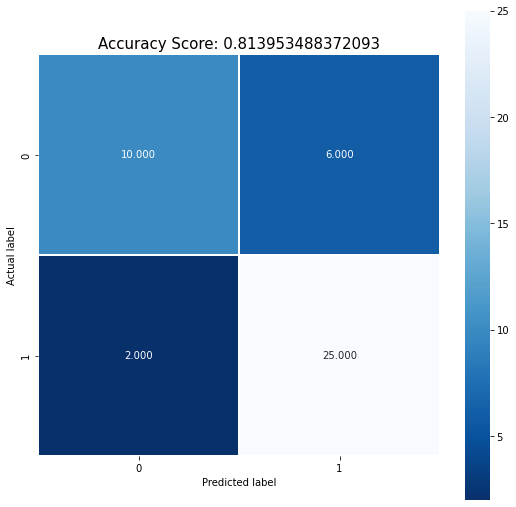

In [80]:
plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(reg.score(x_test,y_test))
plt.title(all_sample_title, size = 15);

In [81]:
# True Positive - 10
# True negative - 25
# False Positive - 6
# False Negative - 2

In [82]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))

Accuracy: 0.813953488372093
Precision: 0.8064516129032258
Recall: 0.9259259259259259


In [83]:
y_pred1=reg.predict(x)
print("accuracy: "+ str(reg.score(x,y)*100) + "%")

accuracy: 88.83720930232558%


In [84]:
# Predicting the Actual data on the model fitted with train data.
# Accuracy of prediction increased on actual data.

In [85]:
# Below is the Actual Data v/s Predicted.

In [86]:
df3 = pd.DataFrame({'Actual': y, 'Predicted': y_pred1})
df3.head(20)

,Actual,Predicted
0,1,1
1,1,1
2,1,1
3,0,0
4,1,1
5,0,1
6,0,0
7,1,1
8,1,1
9,0,1
